 # Linear Regression and Analysis
 
 **Dataset used: housing**


In [81]:
#Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Load the dataset
house_df = pd.read_csv('housing.csv')

# Basic data inspection
print(house_df.describe())

house_df.head()

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [83]:
#Checking the missing values
print(house_df.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Only **Total Bedrooms** has null values. So data imputation is performed only for that feature.

In [84]:
# Impute missing values in 'total bedrooms' with the mean/median
house_df['total_bedrooms'].fillna(house_df['total_bedrooms'].mean(),
                                  inplace=True)

#Checking the missing values
print(house_df.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [85]:
# Check the initial shape of the DataFrame before removing outliers
print(f'Original shape: {house_df.shape}')
print(f'Shape after removing outliers: {house_df.shape}')

# Identify numerical columns
nc = house_df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores for numerical features only*
z_scores = np.abs((house_df[nc]-house_df[nc].mean())/house_df[nc].std())

# Remove outliers
house_df = house_df[(z_scores < 3).all(axis=1)]
print()

# Check the shape of the DataFrame after removing outliers
print(f'Original shape: {house_df.shape}')
print(f'Shape after removing outliers: {house_df.shape}')

Original shape: (20640, 10)
Shape after removing outliers: (20640, 10)

Original shape: (19746, 10)
Shape after removing outliers: (19746, 10)


**894 rows have contained outliers** and have been dropped by their z-score and the dataframe is modified.

In [86]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
categorical_cols = house_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
house_df_encoded = pd.get_dummies(house_df, columns=categorical_cols,
                                  drop_first=True)

# Define features and target variable
features = house_df_encoded.drop('median_house_value', axis=1)
target = house_df_encoded['median_house_value']

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_house_df = pd.DataFrame(scaled_features,
                                  columns=features.columns)

# Check the shape of the scaled features
print(f'Scaled features shape: {scaled_house_df.shape}')

print("Scaled House Dataframe:")
scaled_house_df.head()

Scaled features shape: (19746, 12)
Scaled House Dataframe:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.320408,1.038995,0.964837,-1.053400,-1.262319,-1.280730,-1.250056,2.872000,-0.68466,-0.015915,2.826978,-0.384044
1,-1.315416,1.029669,-0.645916,3.281952,2.114933,1.409319,2.531830,2.857142,-0.68466,-0.015915,2.826978,-0.384044
2,-1.325401,1.025006,1.850751,-0.644194,-1.051457,-1.055589,-1.059467,2.205358,-0.68466,-0.015915,2.826978,-0.384044
3,-1.330393,1.025006,1.850751,-0.778737,-0.895903,-0.975366,-0.902511,1.197528,-0.68466,-0.015915,2.826978,-0.384044
4,-1.330393,1.025006,1.850751,-0.532656,-0.740349,-0.966309,-0.753029,0.075698,-0.68466,-0.015915,2.826978,-0.384044


In [87]:
import random
random.seed(75)

#Regression Equation and line generation

# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(scaled_house_df,
                                                target, test_size=0.2,
                                                random_state=42)

In [88]:
# Build the linear regression and fit the data
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercepts
print("Coefficients:", model.coef_)
print()
print("Intercept:", model.intercept_)

Coefficients: [-50166.93631458 -51294.63094038  14791.32713103 -21474.63677695
  40888.56749063 -44105.87040995  28615.58969935  71590.76743755
 -16470.76911248   2726.12641885  -2317.05633804   1466.47521746]

Intercept: 201464.9647638513


In [89]:
# Use the bulit model to make predictions
y_pred = model.predict(X_test)

In [90]:
# Accuracy of the model
model.score(X_test,y_test)

0.6356100956744977

In [91]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 4526005371.698366
RMSE: 67275.59268931315
MAE: 48824.33752498702
R-squared: 0.6356100956744977


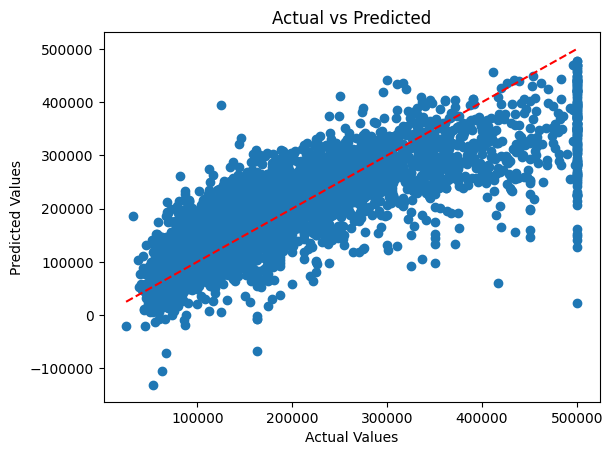

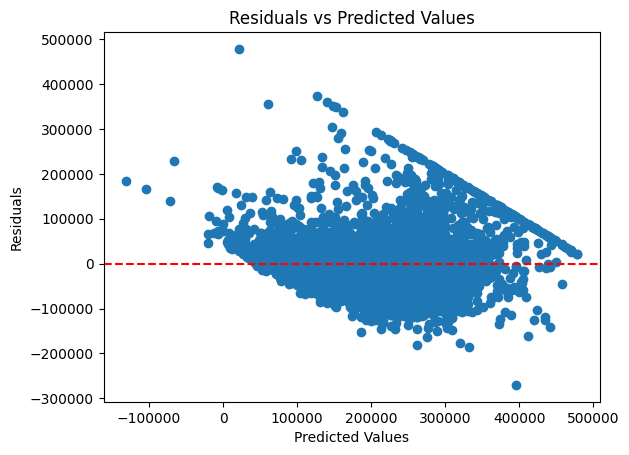

In [92]:
# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()],
 [y_test.min(), y_test.max()], 'r--')
plt.show()
print()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [93]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Fit model again with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train);

In [94]:
#Regularization - For improving model performance
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [95]:
#The new accuracies

print("For Ridge model:",ridge_model.score(X_test,y_test))
print("For Lasso model:",lasso_model.score(X_test,y_test))

For Ridge model: 0.6356010134701134
For Lasso model: 0.6356098655998084


**No Improvement** , even post changing the model

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(grid_search.score(X_test,y_test))

0.6355138459781112


No improvement even after Hyperparameter tuning

In [98]:
print("The final fixed score is:",0.6355)

The final fixed score is: 0.6355


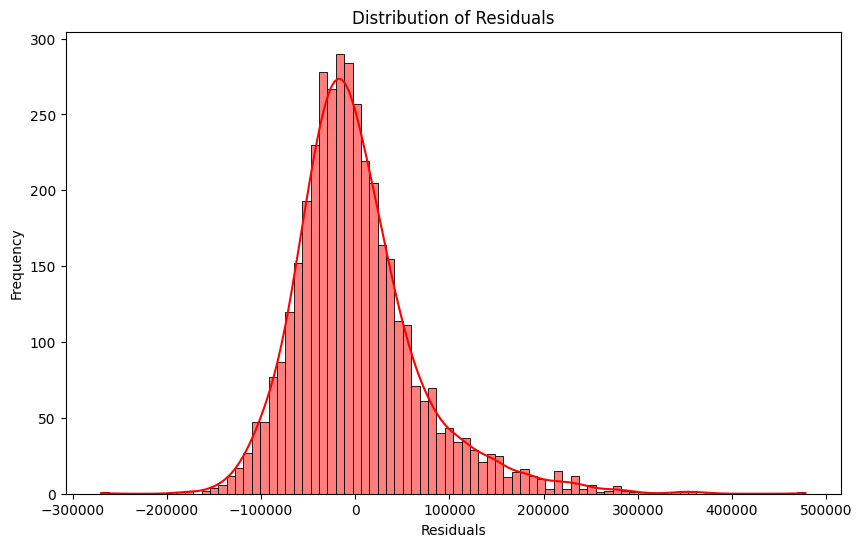

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

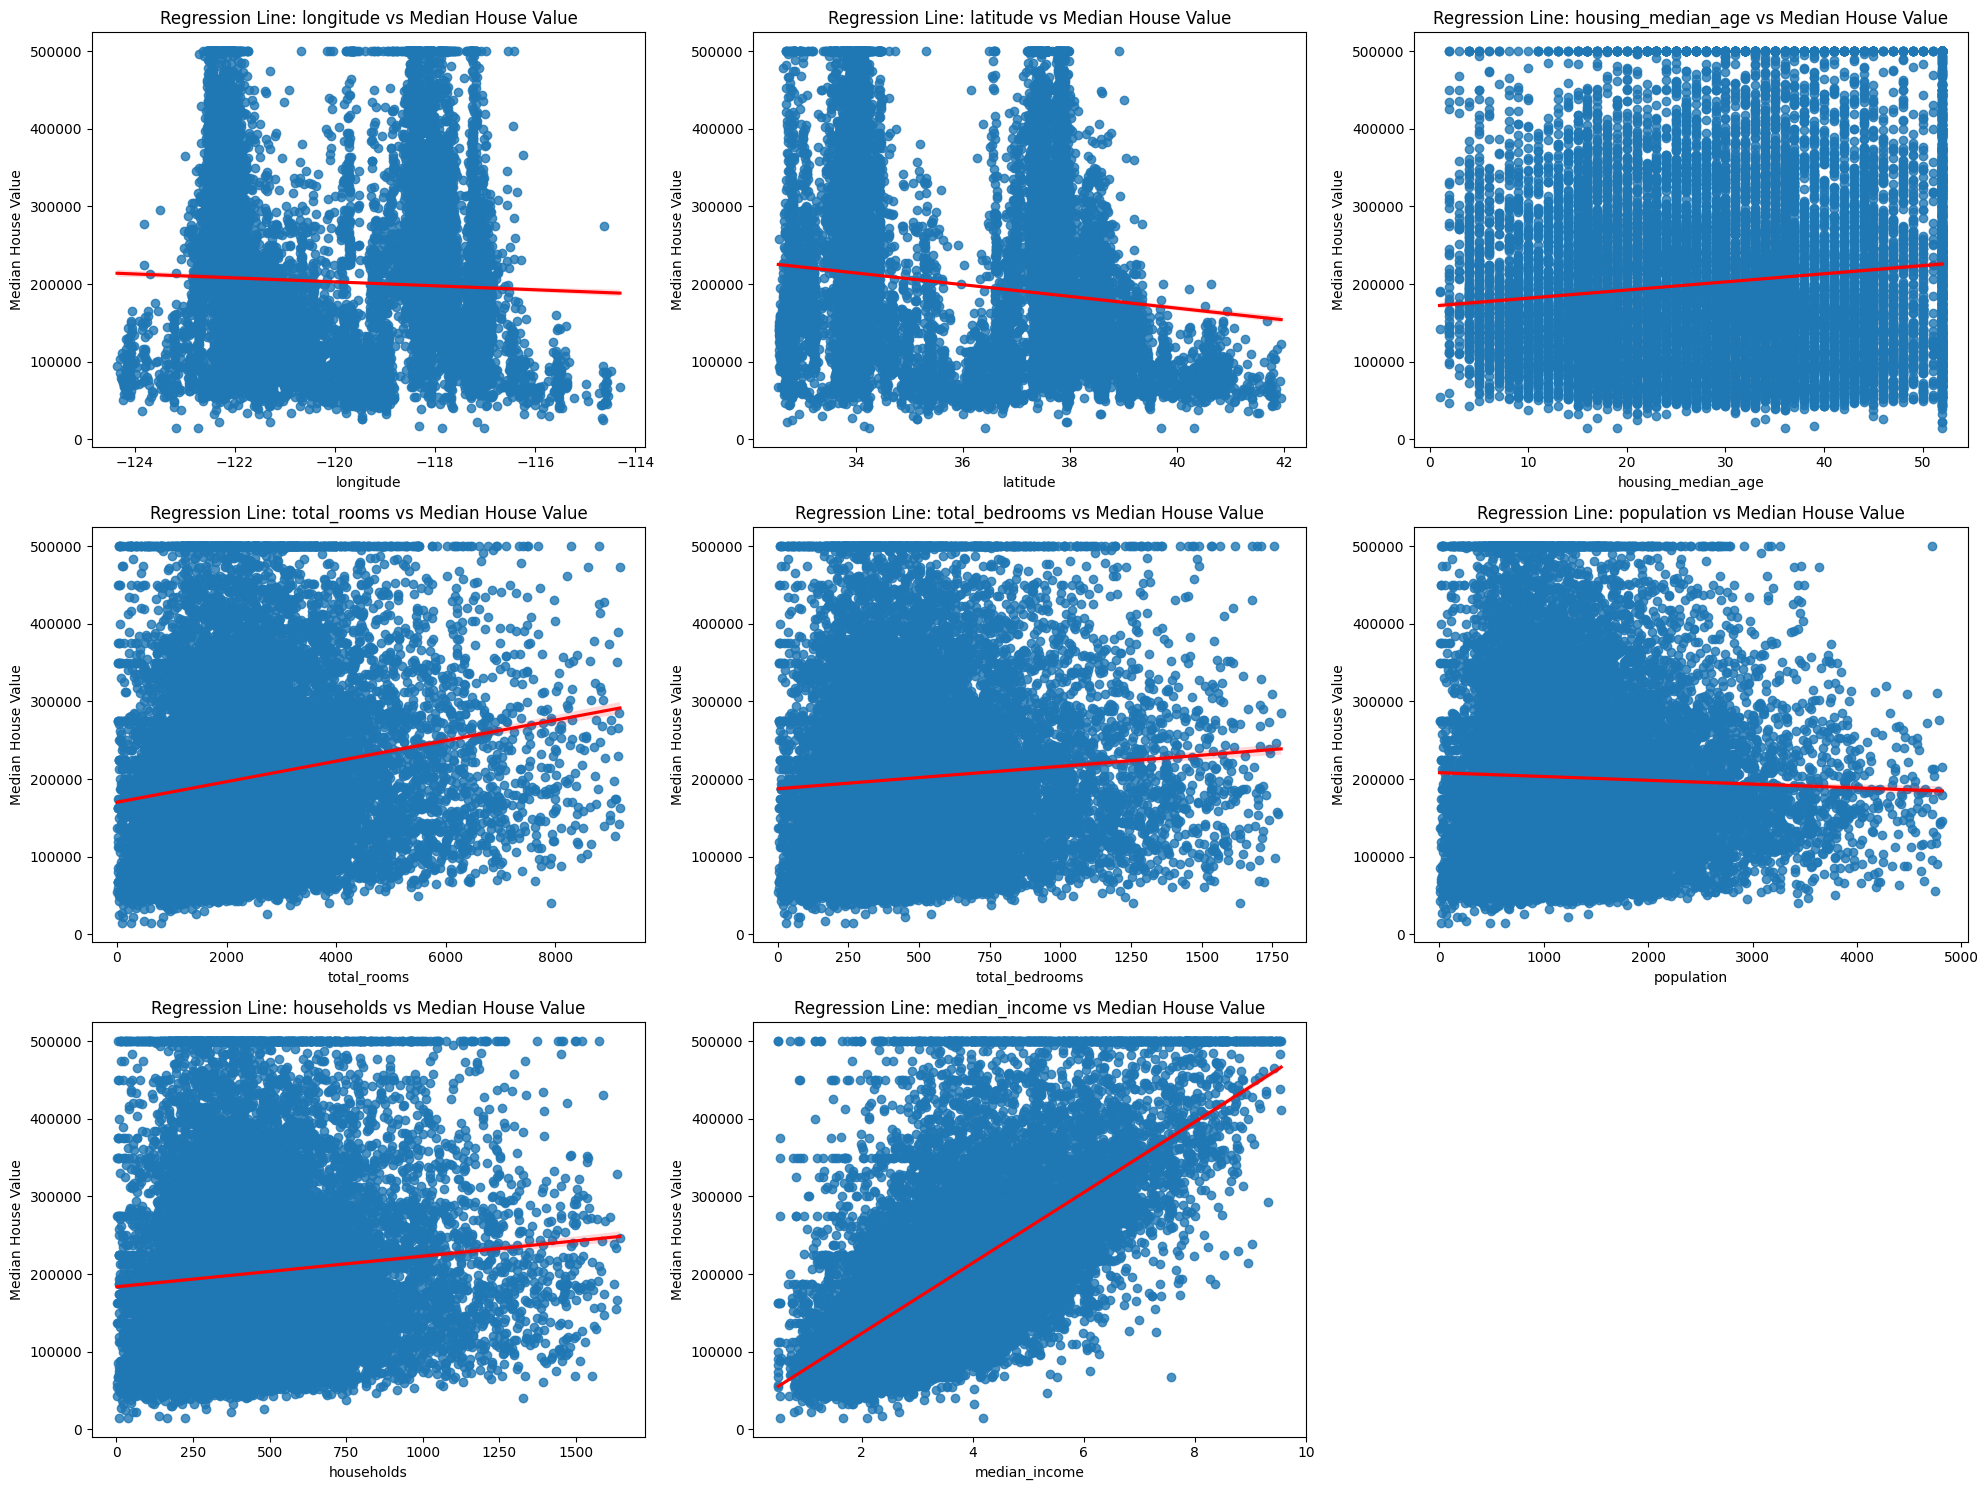

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 3
n_features = house_df.drop('median_house_value', axis=1)
n_features = n_features.select_dtypes(include=[np.number]).columns
n_rows = (len(n_features) + n_cols - 1) // n_cols

# Create a figure with subplots
plt.figure(figsize=(20, n_rows * 5))

for i, feature in enumerate(n_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.regplot(x=house_df[feature], y=house_df['median_house_value'],
                line_kws={"color": "red"})
    plt.title(f'Regression Line: {feature} vs Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()

# Inference:

-->The model's score is  0.6355, even after
hyperparameter tuning and regularization and feature engineering.

-->The regression model performs lower than ensemble models
and random forest models.